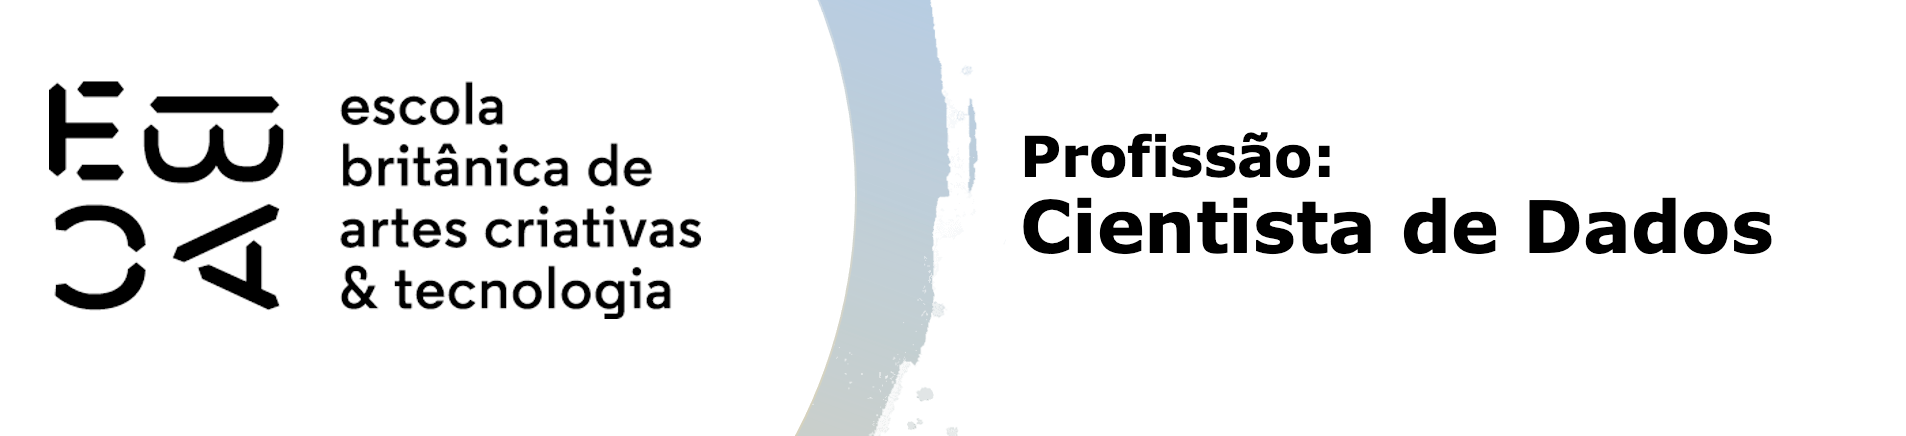

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [4]:
print(df.columns.tolist())


['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda', 'mau']


In [5]:
df = df.sort_values("data_ref")
ultimos_3_meses = df["data_ref"].drop_duplicates().sort_values().tail(3).tolist()

df_dev = df[~df["data_ref"].isin(ultimos_3_meses)].copy()
df_oot = df[df["data_ref"].isin(ultimos_3_meses)].copy()

variaveis_explicativas = [col for col in df.columns if col not in ["data_ref", "index", "mau"]]

X_dev = df_dev[variaveis_explicativas]
y_dev = df_dev["mau"]

X_oot = df_oot[variaveis_explicativas]
y_oot = df_oot["mau"]

print("Tamanho base desenvolvimento:", X_dev.shape)
print("Tamanho base OOT:", X_oot.shape)


Tamanho base desenvolvimento: (600000, 12)
Tamanho base OOT: (150000, 12)


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [6]:
print("Número total de linhas:", df.shape[0])
print("Número total de colunas:", df.shape[1])
print("\nQuantidade de linhas por mês em data_ref:")
print(df["data_ref"].value_counts().sort_index())

variaveis_numericas = df.select_dtypes(include=["int64","float64"]).columns.tolist()
variaveis_categoricas = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

print("\nResumo estatístico variáveis numéricas:")
print(df[variaveis_numericas].describe().T)

print("\nFrequências variáveis categóricas:")
for col in variaveis_categoricas:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False))
    print(df[col].value_counts(normalize=True, dropna=False).round(3))


Número total de linhas: 750000
Número total de colunas: 15

Quantidade de linhas por mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

Resumo estatístico variáveis numéricas:
                          count          mean           std         min  \
index                  750000.0   8319.272793   4809.281774    0.000000   
qtd_filhos             750000.0      0.433251      0.739379    0.000000   
idade                  750000.0     43.804733     11.229868   22.000000   
tempo_emprego          624043.0      7.748574      6.687455    0.117808   
qt_pessoas_residencia  750000.0      2.212241      0.903428    1.000000   
renda                  750000.0  23238.544747  79106.013795  107.670000 

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável


=== Análise Bivariada: Variáveis Numéricas ===

Variável: qtd_filhos
        count      mean       std  min  max  25%  50%  75%
mau                                                       
False  691357  0.431739  0.737456    0   14  0.0  0.0  1.0
True    58643  0.451068  0.761465    0   14  0.0  0.0  1.0


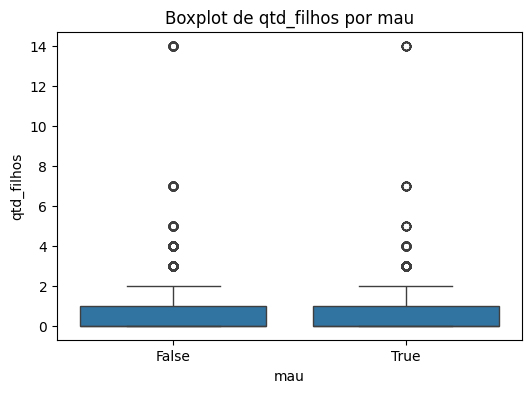


Variável: idade
        count       mean        std  min  max   25%   50%   75%
mau                                                            
False  691357  43.896274  11.193997   22   68  35.0  43.0  53.0
True    58643  42.725543  11.590152   22   68  33.0  41.0  52.0


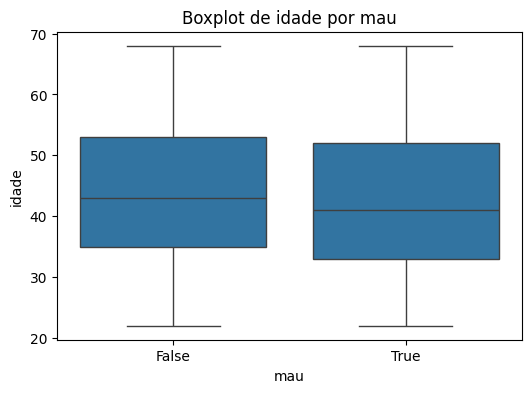


Variável: tempo_emprego
        count      mean       std       min        max       25%       50%  \
mau                                                                          
False  575806  8.004300  6.807303  0.117808  42.906849  3.219178  6.345205   
True    48237  4.695965  3.913739  0.117808  42.906849  1.715068  3.854795   

             75%  
mau               
False  10.556164  
True    6.621918  


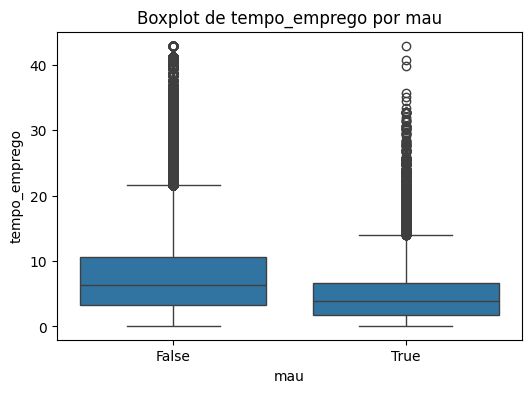


Variável: qt_pessoas_residencia
        count      mean       std  min   max  25%  50%  75%
mau                                                        
False  691357  2.211221  0.901365  1.0  15.0  2.0  2.0  3.0
True    58643  2.224272  0.927327  1.0  15.0  2.0  2.0  3.0


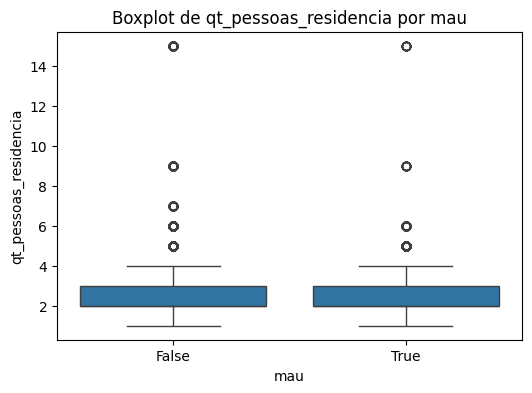


Variável: renda
        count          mean           std     min         max       25%  \
mau                                                                       
False  691357  24804.689618  82154.474316  113.36  4083986.22  3896.300   
True    58643   4774.871007   9612.302738  107.67   989799.47  1301.785   

           50%       75%  
mau                       
False  8602.87  19688.06  
True   2507.28   5133.16  


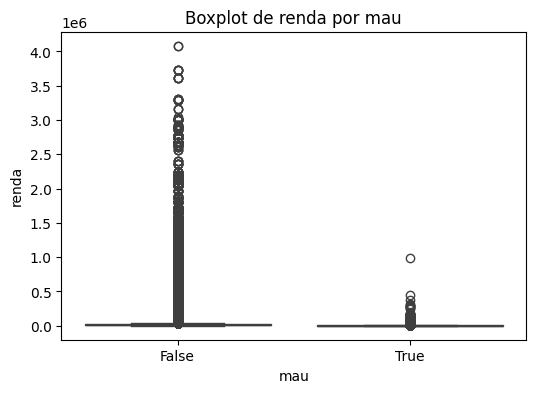


=== Análise Bivariada: Variáveis Categóricas ===

Variável: sexo
Contagem:
 mau    False   True     All
sexo                       
F     463950  40630  504580
M     227407  18013  245420
All   691357  58643  750000
Proporção:
 mau   False  True 
sexo              
F     0.919  0.081
M     0.927  0.073
Taxa de inadimplência:
 sexo
F      0.080522
M      0.073397
All    0.078191
dtype: float64


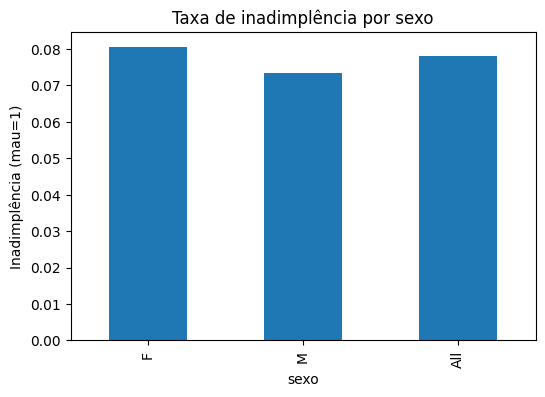


Variável: posse_de_veiculo
Contagem:
 mau                False   True     All
posse_de_veiculo                       
N                 421872  36082  457954
S                 269485  22561  292046
All               691357  58643  750000
Proporção:
 mau               False  True 
posse_de_veiculo              
N                 0.921  0.079
S                 0.923  0.077
Taxa de inadimplência:
 posse_de_veiculo
N      0.078790
S      0.077252
All    0.078191
dtype: float64


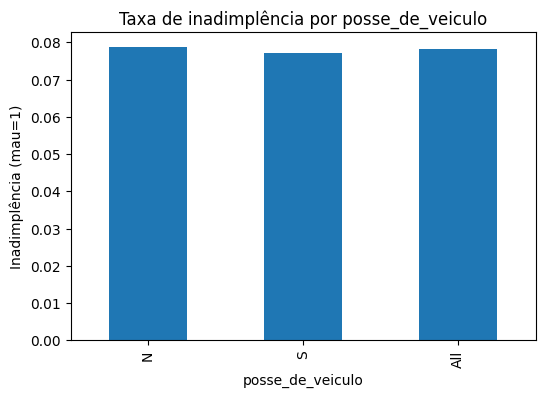


Variável: posse_de_imovel
Contagem:
 mau               False   True     All
posse_de_imovel                       
N                224515  21793  246308
S                466842  36850  503692
All              691357  58643  750000
Proporção:
 mau              False  True 
posse_de_imovel              
N                0.912  0.088
S                0.927  0.073
Taxa de inadimplência:
 posse_de_imovel
N      0.088479
S      0.073160
All    0.078191
dtype: float64


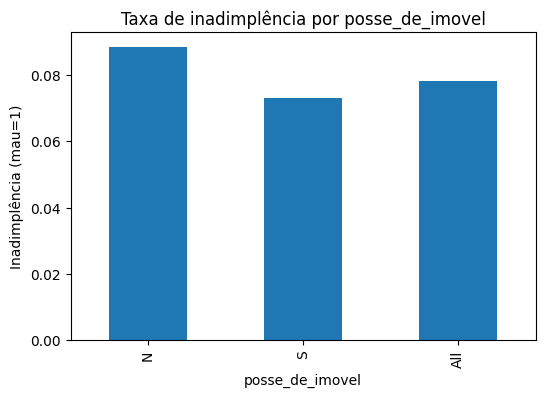


Variável: tipo_renda
Contagem:
 mau                False   True     All
tipo_renda                             
Assalariado       354527  31213  385740
Bolsista             346     15     361
Empresário        159508  13204  172712
Pensionista       115825  10440  126265
Servidor público   61151   3771   64922
All               691357  58643  750000
Proporção:
 mau               False  True 
tipo_renda                    
Assalariado       0.919  0.081
Bolsista          0.958  0.042
Empresário        0.924  0.076
Pensionista       0.917  0.083
Servidor público  0.942  0.058
Taxa de inadimplência:
 tipo_renda
Assalariado         0.080917
Bolsista            0.041551
Empresário          0.076451
Pensionista         0.082683
Servidor público    0.058085
All                 0.078191
dtype: float64


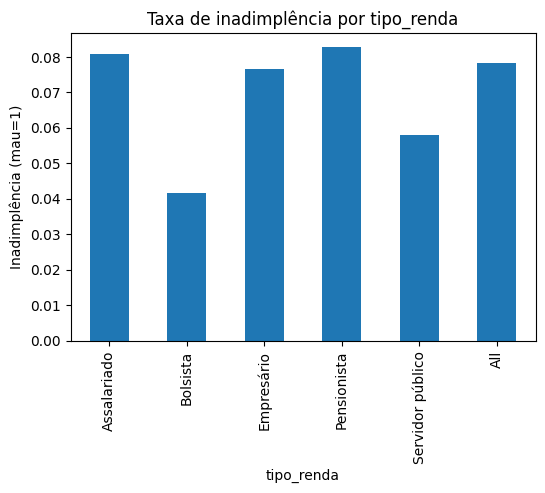


Variável: educacao
Contagem:
 mau                   False   True     All
educacao                                  
Fundamental            7789    786    8575
Médio                466106  40730  506836
Pós graduação           753     59     812
Superior completo    189684  14622  204306
Superior incompleto   27025   2446   29471
All                  691357  58643  750000
Proporção:
 mau                  False  True 
educacao                         
Fundamental          0.908  0.092
Médio                0.920  0.080
Pós graduação        0.927  0.073
Superior completo    0.928  0.072
Superior incompleto  0.917  0.083
Taxa de inadimplência:
 educacao
Fundamental            0.091662
Médio                  0.080361
Pós graduação          0.072660
Superior completo      0.071569
Superior incompleto    0.082997
All                    0.078191
dtype: float64


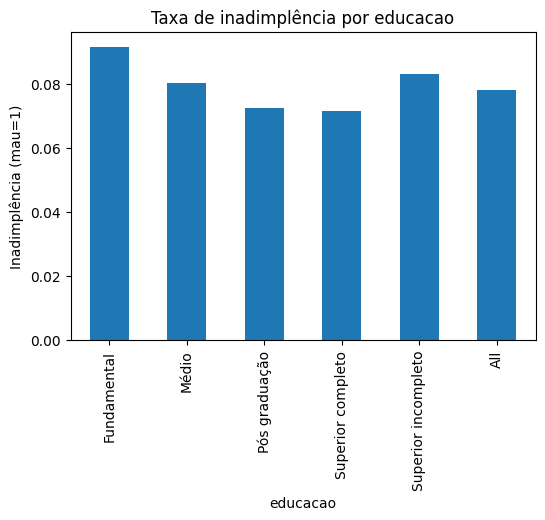


Variável: estado_civil
Contagem:
 mau            False   True     All
estado_civil                       
Casado        485953  40519  526472
Separado       39090   3481   42571
Solteiro       84214   7445   91659
União          52846   4839   57685
Viúvo          29254   2359   31613
All           691357  58643  750000
Proporção:
 mau           False  True 
estado_civil              
Casado        0.923  0.077
Separado      0.918  0.082
Solteiro      0.919  0.081
União         0.916  0.084
Viúvo         0.925  0.075
Taxa de inadimplência:
 estado_civil
Casado      0.076963
Separado    0.081769
Solteiro    0.081225
União       0.083887
Viúvo       0.074621
All         0.078191
dtype: float64


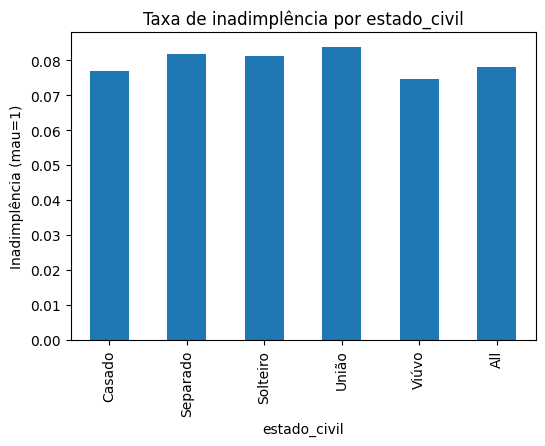


Variável: tipo_residencia
Contagem:
 mau               False   True     All
tipo_residencia                       
Aluguel            9416    933   10349
Casa             622288  52006  674294
Com os pais       30086   3146   33232
Comunitário        3012    278    3290
Estúdio            5042    353    5395
Governamental     21513   1927   23440
All              691357  58643  750000
Proporção:
 mau              False  True 
tipo_residencia              
Aluguel          0.910  0.090
Casa             0.923  0.077
Com os pais      0.905  0.095
Comunitário      0.916  0.084
Estúdio          0.935  0.065
Governamental    0.918  0.082
Taxa de inadimplência:
 tipo_residencia
Aluguel          0.090154
Casa             0.077127
Com os pais      0.094668
Comunitário      0.084498
Estúdio          0.065431
Governamental    0.082210
All              0.078191
dtype: float64


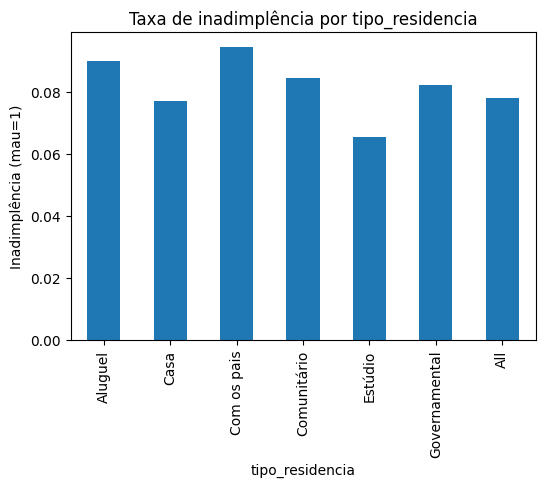

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_feather('credit_scoring.ftr')

variaveis_numericas = df.select_dtypes(include=["int64","float64"]).columns.tolist()
variaveis_categoricas = df.select_dtypes(include=["object","category","bool"]).columns.tolist()

variaveis_numericas = [col for col in variaveis_numericas if col not in ["index", "mau"]]
variaveis_categoricas = [col for col in variaveis_categoricas if col != "mau"]

print("\n=== Análise Bivariada: Variáveis Numéricas ===")
for col in variaveis_numericas:
    print(f"\nVariável: {col}")
    resumo = df.groupby("mau")[col].agg(["count", "mean", "std", "min", "max"])
    resumo["25%"] = df.groupby("mau")[col].quantile(0.25)
    resumo["50%"] = df.groupby("mau")[col].median()
    resumo["75%"] = df.groupby("mau")[col].quantile(0.75)
    print(resumo)
    plt.figure(figsize=(6,4))
    sns.boxplot(x="mau", y=col, data=df)
    plt.title(f"Boxplot de {col} por mau")
    plt.xlabel("mau")
    plt.ylabel(col)
    plt.show()

print("\n=== Análise Bivariada: Variáveis Categóricas ===")
for col in variaveis_categoricas:
    print(f"\nVariável: {col}")
    tabela = pd.crosstab(df[col], df["mau"], margins=True)
    print("Contagem:\n", tabela)
    tabela_perc = pd.crosstab(df[col], df["mau"], normalize="index").round(3)
    print("Proporção:\n", tabela_perc)
    taxa_inad = tabela[1] / tabela[[0,1]].sum(axis=1)
    print("Taxa de inadimplência:\n", taxa_inad)
    taxa_inad.plot(kind="bar", figsize=(6,4), title=f"Taxa de inadimplência por {col}")
    plt.ylabel("Inadimplência (mau=1)")
    plt.show()


## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import mstats

df = pd.read_feather('credit_scoring.ftr')

df = df.sort_values("data_ref")
ultimos_3_meses = df["data_ref"].drop_duplicates().sort_values().tail(3).tolist()
df_dev = df[~df["data_ref"].isin(ultimos_3_meses)].copy()
df_oot = df[df["data_ref"].isin(ultimos_3_meses)].copy()

variaveis_explicativas = [col for col in df.columns if col not in ["data_ref", "index", "mau"]]

X_dev = df_dev[variaveis_explicativas].copy()
y_dev = df_dev["mau"].copy()
X_oot = df_oot[variaveis_explicativas].copy()
y_oot = df_oot["mau"].copy()

numericas = X_dev.select_dtypes(include=["int64","float64"]).columns.tolist()
categoricas = X_dev.select_dtypes(include=["object","category","bool"]).columns.tolist()

for col in numericas:
    X_dev.loc[:, col] = X_dev[col].fillna(X_dev[col].median())
    X_oot.loc[:, col] = X_oot[col].fillna(X_dev[col].median())
    if col in ["renda", "tempo_emprego"]:
        X_dev.loc[:, col] = mstats.winsorize(X_dev[col], limits=[0.01, 0.01])
        X_oot.loc[:, col] = mstats.winsorize(X_oot[col], limits=[0.01, 0.01])

for col in categoricas:
    X_dev.loc[:, col] = X_dev[col].fillna("Desconhecido")
    X_oot.loc[:, col] = X_oot[col].fillna("Desconhecido")

X_dev.loc[:, "tipo_renda"] = X_dev["tipo_renda"].replace({"Bolsista": "Outros"})
X_oot.loc[:, "tipo_renda"] = X_oot["tipo_renda"].replace({"Bolsista": "Outros"})
X_dev.loc[:, "educacao"] = X_dev["educacao"].replace({"Fundamental": "Outros", "Pós graduação": "Outros"})
X_oot.loc[:, "educacao"] = X_oot["educacao"].replace({"Fundamental": "Outros", "Pós graduação": "Outros"})

X_dev_enc = pd.get_dummies(X_dev, drop_first=True)
X_oot_enc = pd.get_dummies(X_oot, drop_first=True)
X_oot_enc = X_oot_enc.reindex(columns=X_dev_enc.columns, fill_value=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_dev_enc, y_dev)

y_pred_prob = model.predict_proba(X_oot_enc)[:,1]
y_pred = model.predict(X_oot_enc)

print(classification_report(y_oot, y_pred))
print("AUC:", roc_auc_score(y_oot, y_pred_prob))

coef = pd.DataFrame({"Variavel": X_dev_enc.columns, "Coeficiente": model.coef_[0]})
coef = coef.sort_values(by="Coeficiente", ascending=False)
print(coef)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

              precision    recall  f1-score   support

       False       0.85      1.00      0.92    128000
        True       0.00      0.00      0.00     22000

    accuracy                           0.85    150000
   macro avg       0.43      0.50      0.46    150000
weighted avg       0.73      0.85      0.79    150000

AUC: 0.7215389849076704
                         Variavel  Coeficiente
0                      qtd_filhos     0.281663
17             estado_civil_União     0.052655
6              posse_de_veiculo_S     0.031743
12                educacao_Outros     0.006711
9               tipo_renda_Outros     0.004058
4                           renda    -0.000102
1                           idade    -0.000596
2                   tempo_emprego    -0.023810
11    tipo_renda_Servidor público    -0.026184
22        tipo_residencia_Estúdio    -0.031980
21    tipo_residencia_Comunitário    -0.057286
8           tipo_renda_Empresário    -0.064663
13     educacao_Superior completo    -

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

def gini(y_true, y_scores):
    return 2 * roc_auc_score(y_true, y_scores) - 1

def ks_stat(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    return max(tpr - fpr)

# Previsões
y_dev_prob = model.predict_proba(X_dev_enc)[:,1]
y_dev_pred = model.predict(X_dev_enc)

y_oot_prob = model.predict_proba(X_oot_enc)[:,1]
y_oot_pred = model.predict(X_oot_enc)

# Cálculo das métricas
metrics = {
    "Base": ["Desenvolvimento", "OOT"],
    "Acurácia": [
        accuracy_score(y_dev, y_dev_pred),
        accuracy_score(y_oot, y_oot_pred)
    ],
    "KS": [
        ks_stat(y_dev, y_dev_prob),
        ks_stat(y_oot, y_oot_prob)
    ],
    "Gini": [
        gini(y_dev, y_dev_prob),
        gini(y_oot, y_oot_prob)
    ]
}

df_metrics = pd.DataFrame(metrics)
df_metrics[["Acurácia","KS","Gini"]] = df_metrics[["Acurácia","KS","Gini"]].round(3)

print(df_metrics)

              Base  Acurácia     KS   Gini
0  Desenvolvimento     0.939  0.393  0.530
1              OOT     0.853  0.324  0.443
